In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [23]:
dataset = pd.read_csv('income_classification.csv')
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
dataset.shape

(32561, 15)

In [25]:
dataset.index

RangeIndex(start=0, stop=32561, step=1)

In [26]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [27]:
dataset[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [28]:
dataset[' native-country'].value_counts()[0:10]

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
Name:  native-country, dtype: int64

In [29]:
dataset[' native-country'].value_counts()[0:10].keys()

Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba'],
      dtype='object')

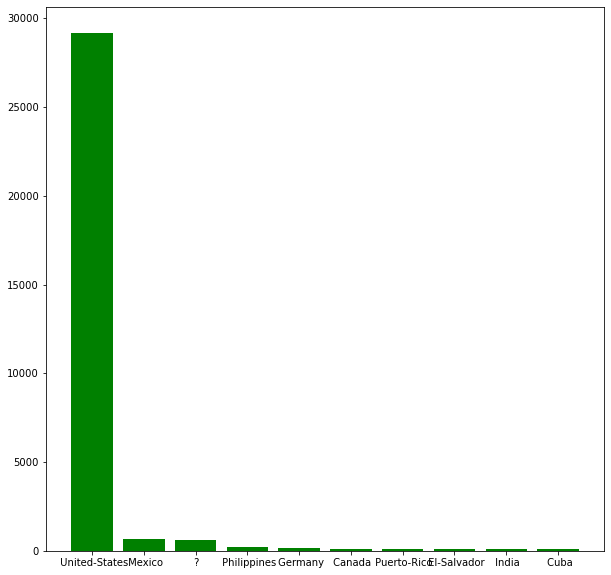

In [30]:
plt.figure(figsize=(10,10))
plt.bar(list(dataset[' native-country'].value_counts()[0:10].keys()), list(dataset[' native-country'].value_counts()[0:10]),color="g")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

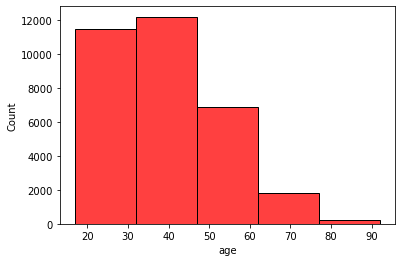

In [31]:
sns.histplot(data = dataset, x = "age", color='red',binwidth=15)

<AxesSubplot:xlabel=' workclass', ylabel='Count'>

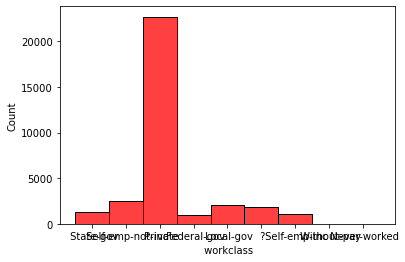

In [32]:
sns.histplot(data = dataset, x = " workclass", color='red',binwidth=15)

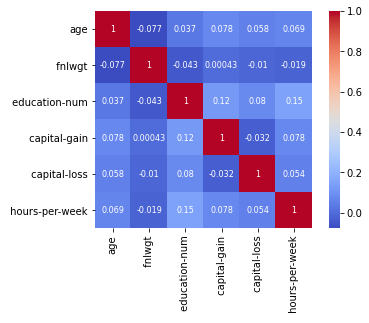

In [33]:
dataplot = sns.heatmap(dataset.corr(),cmap="coolwarm",annot=True, annot_kws={"size": 8}, square=True)

<AxesSubplot:xlabel=' race', ylabel='Count'>

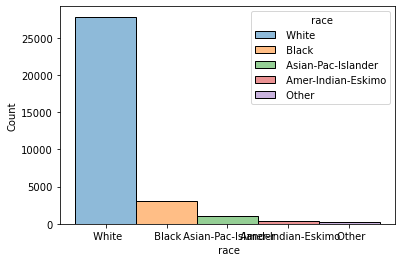

In [34]:
sns.histplot(x = ' race', data = dataset, hue=' race', discrete=True)

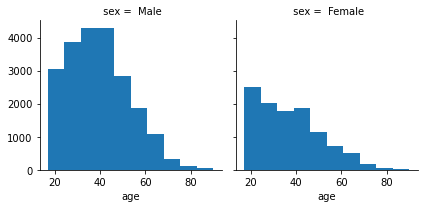

In [35]:
g=sns.FacetGrid(data = dataset, col=" sex")
g.map(plt.hist,'age')

In [36]:
dataset[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

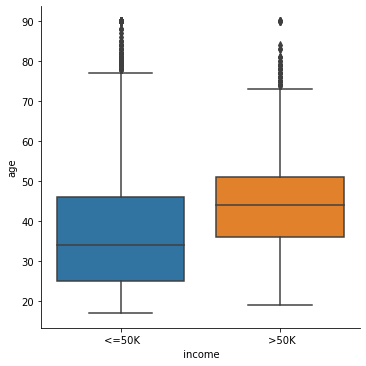

In [37]:
sns.catplot(x=" income", y="age", kind = "box", data=dataset)

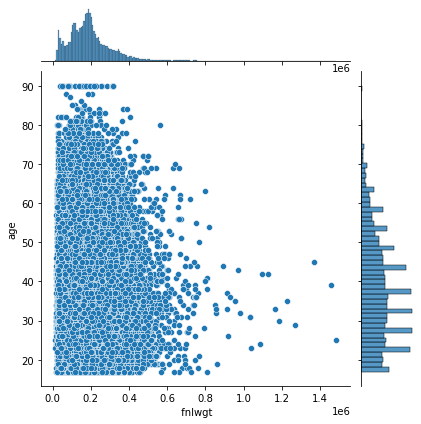

In [38]:
sns.jointplot(data=dataset, x=" fnlwgt", y="age")

Estimated coefficients:
b_0 = -2470.9918803717155 
b_1 = 352.02396627066247


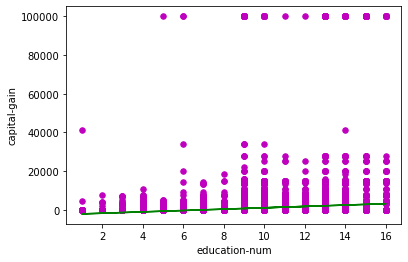

In [40]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('education-num')
    plt.ylabel('capital-gain')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = dataset[' education-num'].values
    y = dataset[' capital-gain'].values
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()